In [1]:
import numpy as np
from lsst.sims.almanac import Almanac
import matplotlib.pylab as plt
import pandas as pd
import sqlite3
from utils import Constellation, starlink_constellation
import sys

import healpy as hp
%matplotlib inline
from lsst.sims.utils import _raDec2Hpid, hpid2RaDec

In [2]:
sat_tles = starlink_constellation()
constellation = Constellation(sat_tles)

In [16]:
#mjd_start = 59859.375573254 # sunalt = -16.2903238482603 degrees
mjd_start = 59863.0097259146 # sunlat = -18.3928422773296
step=1./3600/24.
length = 10./60/24.
#mjd_start += length
mjds = np.arange(mjd_start, mjd_start+length+step, step)

In [17]:
nside = 64
result = np.zeros(hp.nside2npix(nside))
hpids = np.arange(result.size)
ra,dec = hpid2RaDec(nside, hpids)
below = np.where(dec < 30.)
result[below] = np.nan

In [18]:
for mjd in mjds:
    constellation.update_mjd(mjd)
    above = constellation.above_alt_limit
    hpids = _raDec2Hpid(nside, constellation.azimuth_rad[above], constellation.altitudes_rad[above])
    result[hpids] += 1

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


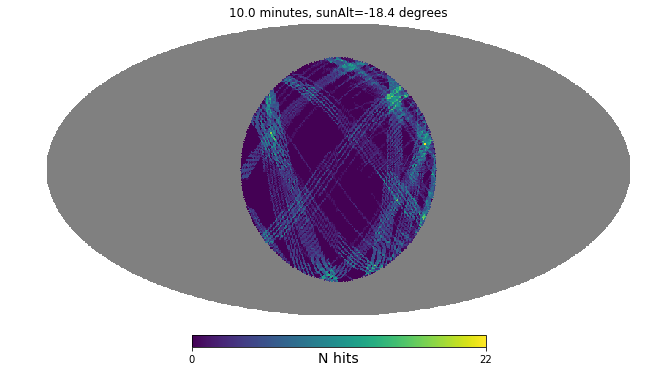

In [21]:

hp.mollview(result, rot=(0,90,0), title='%.1f minutes, sunAlt=-18.4 degrees' % (length*60*24), unit='N hits')

# Note, this is just healpixels that get hit! Need to convolve with 3.5 deg FoV to make sure we don't have any hits.
plt.savefig('post_twi_example.png')